In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/ml_projects/ey_nextwave0"

Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2

In [0]:
#
from fastai.collab import *
from fastai.tabular import *

In [0]:
#
path = Path(root_dir + '/data/')
path

PosixPath('/content/gdrive/My Drive/ml_projects/ey_nextwave0/data')

In [0]:
# creates a train dataframe
train_df = pd.read_csv(path/'data_train_cleaned.csv')

#
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)

train_df.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,multxy,y
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,1.555917e+12,1.555917e+12,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,-7.162178e+13,0
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,1.555918e+12,1.555918e+12,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,-7.234210e+13,0
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,1.555920e+12,1.555920e+12,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,-7.225185e+13,0
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,1.555921e+12,1.555922e+12,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,-7.224731e+13,0
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,1.555944e+12,1.555944e+12,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,-7.222276e+13,0


In [0]:
len(train_df)

814262

In [0]:
# lists the columns in the dataframe
train_df.columns

Index(['hash', 'trajectory_id', 'time_entry', 'time_exit', 'vmax', 'vmin',
       'vmean', 'x_entry', 'y_entry', 'x_exit', 'y_exit', 'multxy', 'y'],
      dtype='object')

In [0]:
#
procs=[FillMissing, Categorify, Normalize]

In [0]:
# categorical/continuous variables must be created to create a databunch
# 'hash', 'trajectory_id'
cat_vars = []

cont_vars = ['x_entry', 'y_entry', 'time_entry', 'time_exit']

In [0]:
# dependent variable
dep_var = 'y'

# final dataframe
df = train_df[cat_vars + cont_vars + [dep_var]].copy()

In [0]:
df.head(3)

,x_entry,y_entry,time_entry,time_exit,y
0,3.751014e+06,-1.909398e+07,1.555917e+12,1.555917e+12,0
1,3.743937e+06,-1.932247e+07,1.555918e+12,1.555918e+12,0
2,3.744868e+06,-1.929356e+07,1.555920e+12,1.555920e+12,0


## Loading test data

In [0]:
 # test dataframe
test_df = pd.read_csv(path/'data_test_cleaned.csv')

#
test_df.drop(['Unnamed: 0'],axis=1,inplace=True)

test_df.head(3)

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,multxy
0,00032f51796fd5437b238e3a9823d13d_31,traj_00032f51796fd5437b238e3a9823d13d_31_5,1.555945e+12,1.555946e+12,NaN,NaN,NaN,3.773118e+06,-1.914490e+07,NaN,NaN,-7.223597e+13
1,000479418b5561ab694a2870cc04fd43_25,traj_000479418b5561ab694a2870cc04fd43_25_10,1.555947e+12,1.555947e+12,NaN,NaN,NaN,3.769978e+06,-1.934136e+07,NaN,NaN,-7.291652e+13
2,000506a39775e5bca661ac80e3f466eb_29,traj_000506a39775e5bca661ac80e3f466eb_29_5,1.555947e+12,1.555947e+12,NaN,NaN,NaN,3.757468e+06,-1.923860e+07,NaN,NaN,-7.228841e+13


In [0]:
#
valid_idx = range(len(test_df))

valid_idx

range(0, 33515)

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs)
                .split_by_idx(valid_idx)
                
                
                 # label_cls = FloatList informs fastai that this is a regression problem
                 # log due to RMSE 
                .label_from_df(cols = dep_var)
        
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs))
                .databunch(bs=1024))

In [0]:
#
data.show_batch(rows=5)

x_entry,y_entry,time_entry,time_exit,target
0.8253,1.7964,-2.2981,-2.3176,0
-0.0604,-0.2355,0.4452,0.4302,1
-0.2556,1.1991,-2.8080,-2.8263,0
0.1291,0.8314,-0.3190,-0.3431,0
0.4867,-1.1022,0.4092,0.4078,0


In [0]:
# creates a tabular learner
# regularisation can be used to ensure the model doesn't overfit
# ps - provides dropout
# emb_drop provides embedding dropout
# dropout is a form of regularization


# learn = tabular_learner(data, layers=[200,100],
#                         ps=[0.001, 0.01], emb_drop=0.04,
#                         metrics = accuracy)

f_score = partial(fbeta, thresh=0.2, beta = 1)

learn = tabular_learner(data, layers=[200,100],
                        ps=[0.001, 0.01],
                        metrics = accuracy)

In [0]:
learn.model

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=4, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.01)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [0]:
# finds the learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


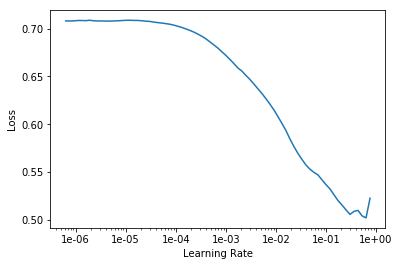

In [0]:
# 
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(5, 1e-04)

epoch,train_loss,valid_loss,accuracy,time
0,0.376465,0.343302,0.872624,00:28
1,0.202472,0.191372,0.923915,00:27
2,0.186150,0.178130,0.926869,00:27
3,0.181004,0.175414,0.927406,00:28
4,0.184094,0.174579,0.928062,00:27


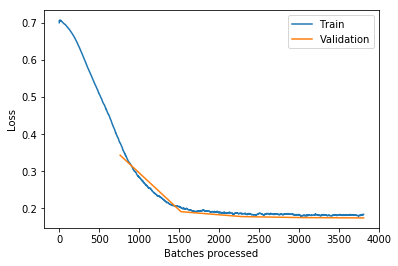

In [0]:
#
learn.recorder.plot_losses()

In [0]:
learn.fit_one_cycle(5, 1e-04, wd=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.202120,0.200002,0.923974,01:28
1,0.203362,0.190844,0.919857,01:26
2,0.200497,0.185254,0.923646,01:25
3,0.196909,0.183918,0.919588,01:25
4,0.188220,0.176086,0.925705,01:25


In [0]:
learn.fit_one_cycle(5, 1e-04, wd=3e-2)

In [0]:
#
probs = learn.get_preds(ds_type=DatasetType.Test)[0]

#
def probs2class(item): 
    return max(range(len(item)), key=item.__getitem__) 

#
result_df = pd.DataFrame({'target': list(map(probs2class, probs))})


result_df.head()

,target
0,0
1,0
2,1
3,0
4,0


In [0]:
submission = pd.merge(test_df, result_df, right_index=True, left_index=True)

submission = submission[['trajectory_id','target']]

submission.rename(columns={'trajectory_id': 'id'}, inplace=True)

submission.head()

,id,target
0,traj_00032f51796fd5437b238e3a9823d13d_31_5,0
1,traj_000479418b5561ab694a2870cc04fd43_25_10,0
2,traj_000506a39775e5bca661ac80e3f466eb_29_5,1
3,traj_0005401ceddaf27a9b7f0d42ef1fbe95_1_4,0
4,traj_00063a4f6c12e1e4de7d876580620667_3_4,0


In [0]:
# creates a test dataframe
from google.colab import files

submission.to_csv('submission_nextwave.csv', index=False)

files.download('submission_nextwave.csv')